### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

Class distribution before undersampling:
Class
0    6
1    4
Name: count, dtype: int64


/tmp/ipykernel_32081/3473292914.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


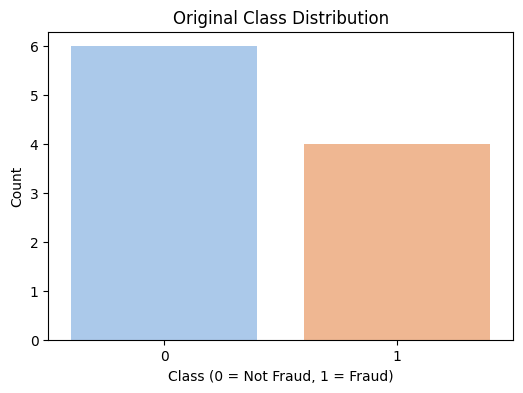


Class distribution after undersampling:
Class
0    4
1    4
Name: count, dtype: int64


/tmp/ipykernel_32081/3473292914.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_balanced, palette='Set2')


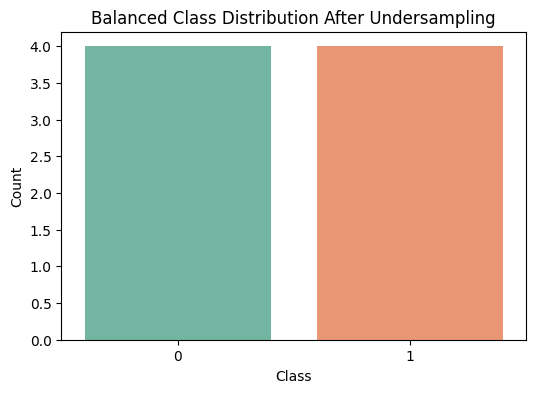

In [2]:
# write your code from here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
# Step 1: Load the dataset
# Replace with your local path if you're running this locally
try:
    df = pd.read_csv("creditcard.csv")  # <-- Adjust path if needed
except FileNotFoundError:
    print("Dataset not found. Please ensure 'creditcard.csv' is available.")
    raise

# Step 2: Explore and visualize class distribution
print("Class distribution before undersampling:")
print(df['Class'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Original Class Distribution')
plt.xlabel('Class (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Step 3: Apply random undersampling
# Separate majority and minority classes
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Step 4: Visualize the balanced dataset
print("\nClass distribution after undersampling:")
print(df_balanced['Class'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df_balanced, palette='Set2')
plt.title('Balanced Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
